In [0]:
# Lab 7 Learning rate and Evaluation
import tensorflow as tf
import random
import matplotlib.pyplot as plt
tf.set_random_seed(777)  # for reproducibility


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

Instructions for updating:
Use `argmax` instead
Epoch: 0001 cost = 2.826302707
Epoch: 0002 cost = 1.061668968
Epoch: 0003 cost = 0.838061323
Epoch: 0004 cost = 0.733232746
Epoch: 0005 cost = 0.669279893
Epoch: 0006 cost = 0.624611839
Epoch: 0007 cost = 0.591160349
Epoch: 0008 cost = 0.563868997
Epoch: 0009 cost = 0.541745184
Epoch: 0010 cost = 0.522673589
Epoch: 0011 cost = 0.506782333
Epoch: 0012 cost = 0.492447658
Epoch: 0013 cost = 0.479955841
Epoch: 0014 cost = 0.468893679
Epoch: 0015 cost = 0.458703495
Learning finished
Accuracy:  0.8951
Label:  [0]
Prediction:  [0]


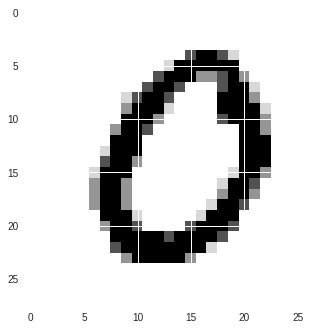

In [4]:
nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={
                            X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch

        print('Epoch:', '%04d' % (epoch + 1),
              'cost =', '{:.9f}'.format(avg_cost))

    print("Learning finished")

    # Test the model using test sets
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(
        mnist.test.images[r:r + 1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest')
    plt.show()




'''
Epoch: 0001 cost = 2.868104637
Epoch: 0002 cost = 1.134684615
Epoch: 0003 cost = 0.908220728
Epoch: 0004 cost = 0.794199896
Epoch: 0005 cost = 0.721815854
Epoch: 0006 cost = 0.670184430
Epoch: 0007 cost = 0.630576546
Epoch: 0008 cost = 0.598888191
Epoch: 0009 cost = 0.573027079
Epoch: 0010 cost = 0.550497213
Epoch: 0011 cost = 0.532001859
Epoch: 0012 cost = 0.515517795
Epoch: 0013 cost = 0.501175288
Epoch: 0014 cost = 0.488425370
Epoch: 0015 cost = 0.476968593
Learning finished
Accuracy:  0.888
'''
